# IMDB SENTIMENT ANALYSIS

Importing All Necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random

Importing Data

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
df=data
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [4]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

# split the dataset  


In [5]:
#train dataset
train_reviews=df.review[:40000]
train_sentiments=df.sentiment[:40000]
print(train_reviews.shape,train_sentiments.shape)

(40000,) (40000,)


In [6]:
#test dataset
test_reviews=df.review[40000:]
test_sentiments=df.sentiment[40000:]

print(test_reviews.shape,test_sentiments.shape)

(10000,) (10000,)


# Text normalization

In [7]:
from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

# Removing html strips and noise text

In [8]:
from bs4 import BeautifulSoup
import re,string,unicodedata

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)



#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



#Apply function on review column
df['review']=df['review'].apply(denoise_text)

# Removing special characters

In [9]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

# Text stemming

In [10]:
#Stemming the text
from nltk.stem.porter import PorterStemmer
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

# Removing stopwords

In [11]:
from nltk.corpus import stopwords
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{"couldn't", 'had', 'an', 'them', 'aren', 'all', 'that', "aren't", 'isn', 'this', 'y', "you've", 'has', 'against', "that'll", 'only', 'mightn', 'down', 'am', 'once', 'through', 'd', 'doesn', 'or', 'i', 'both', "hadn't", 'does', 'have', 'then', "haven't", 'more', 'mustn', 'not', 'wouldn', 'as', "you'll", 'did', 'under', 'hasn', 'm', 'him', 'if', 'hers', 'for', 'but', 'here', 'themselves', 'own', "shouldn't", 'doing', 'weren', 'yourselves', 'won', 're', 'couldn', 'so', "weren't", 'nor', 'it', 'should', 'no', 'a', 'too', "you're", 'yours', 'our', 'before', 'during', 'didn', 'by', 'each', "doesn't", 'itself', 'the', 'haven', 'about', 'wasn', 'between', 'any', 'again', 'they', 'most', "mightn't", 'he', 'hadn', 'its', 'into', 'can', "wouldn't", 'ourselves', 'just', 'ain', "didn't", 'than', 'ma', "shan't", 'below', 'until', 'me', 'be', 'whom', 'will', 'same', 's', 'been', 'at', 'when', 'needn', 'while', 'now', 'his', 'who', 'because', 'where', 'himself', 'there', 'ours', 'and', "don't", 'how'

# Normalized train reviews



In [12]:
#normalized train reviews
norm_train_reviews=df.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

# Normalized test reviews

In [13]:
#Normalized test reviews
norm_test_reviews=df.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

# Bags of words model

It is used to convert text documents to numerical vectors or bag of words.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
print('BOW_cv_train:',cv_train_reviews.shape)

#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


# Term Frequency-Inverse Document Frequency model (TFIDF)
It is used to convert text documents to matrix of tfidf features.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
print('Tfidf_train:',tv_train_reviews.shape)

#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


# Labeling the sentiment text

In [16]:
from sklearn.preprocessing import LabelBinarizer
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)

(50000, 1)


# Split the sentiment tdata

In [17]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
print(train_sentiments)
test_sentiments=sentiment_data[40000:]
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Modelling the dataset

Let us build logistic regression model for both bag of words and tfidf features

In [18]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1, max_iter=500, random_state=42)


C:\Users\Public\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1, max_iter=500, random_state=42)


# Logistic regression model performane on test dataset

In [19]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


# Accuracy of the model

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)


lr_bow_score : 0.7512
lr_tfidf_score : 0.75


# Print the classification report

In [21]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



# Confusion matrix

In [22]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)


#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


# Multinomial Naive Bayes for bag of words and tfidf features

In [23]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()


C:\Users\Public\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()


# Model performance on test data



In [24]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


# Accuracy of the model



In [25]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


# Print the classification report



In [26]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



# Plot the confusion matrix



In [27]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


# Let us see positive and negative words by using WordCloud.

Word cloud for positive review words

<function matplotlib.pyplot.show(*args, **kw)>

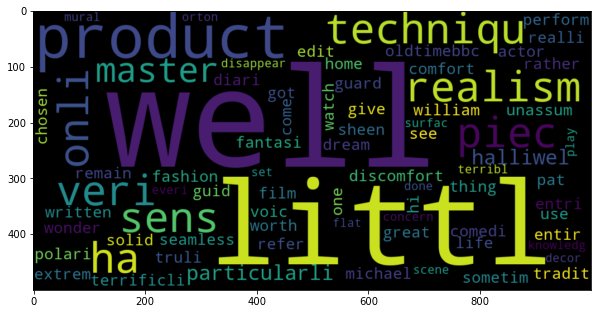

In [28]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

# Word cloud for negative review words

<function matplotlib.pyplot.show(*args, **kw)>

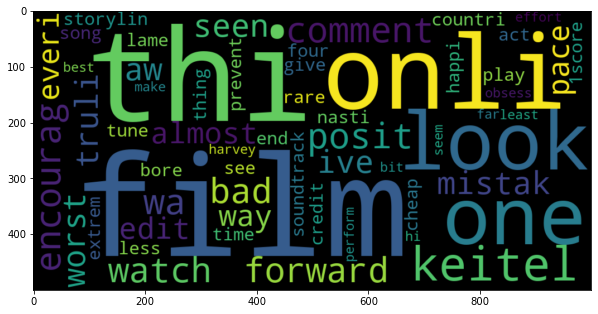

In [29]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show